<a href="https://colab.research.google.com/github/tasninkhanlamha/SkillMorph/blob/main/ML_10_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Android Ransomware Detection Detection**

## **Font family setup**

In [7]:
import matplotlib
# Set font size and family for the entire figure
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['font.family'] = 'serif'

In [8]:
#Dataset Link: https://www.kaggle.com/datasets/subhajournal/android-ransomware-detection

## **Importing Dataset**

In [9]:
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
# Access the file in Google Drive
df = pd.read_csv("/content/drive/MyDrive/Skill Morph/Android_Ransomeware.csv")

## **Basic Information**

In [11]:
df

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,151054,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
1,1,172.217.2.174-10.42.0.211-443-51023-6,10.42.0.211,51023,172.217.2.174,443,6,16/06/2017 03:55:47,349,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
2,2,172.217.12.174-10.42.0.211-443-34259-6,10.42.0.211,34259,172.217.12.174,443,6,16/06/2017 03:55:52,119,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
3,3,172.217.10.74-10.42.0.211-443-55509-6,10.42.0.211,55509,172.217.10.74,443,6,16/06/2017 03:55:53,37055,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
4,4,172.217.2.174-10.42.0.211-443-44852-6,10.42.0.211,44852,172.217.2.174,443,6,16/06/2017 03:55:58,178727,6,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392029,2927,10.42.0.151-10.42.0.1-53849-53-17,10.42.0.151,53849,10.42.0.1,53,17,23/08/2017 04:45:14,24707,1,...,44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WannaLocker
392030,2928,10.42.0.151-96.126.100.203-34559-123-17,10.42.0.151,34559,96.126.100.203,123,17,23/08/2017 04:43:31,81388,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WannaLocker
392031,2929,10.42.0.151-10.42.0.1-23177-53-17,10.42.0.151,23177,10.42.0.1,53,17,23/08/2017 04:43:38,61591,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WannaLocker
392032,2930,10.42.0.151-10.42.0.1-30407-53-17,10.42.0.151,30407,10.42.0.1,53,17,23/08/2017 04:44:56,24831,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,WannaLocker


In [12]:
df.shape

(392034, 86)

In [13]:
df['Label'].value_counts()

,count
Label,
SVpeng,54161
PornDroid,46082
Koler,44555
Benign,43091
RansomBO,39859
Charger,39551
Simplocker,36340
WannaLocker,32701
Jisut,25672


## **Data Samples per Class**

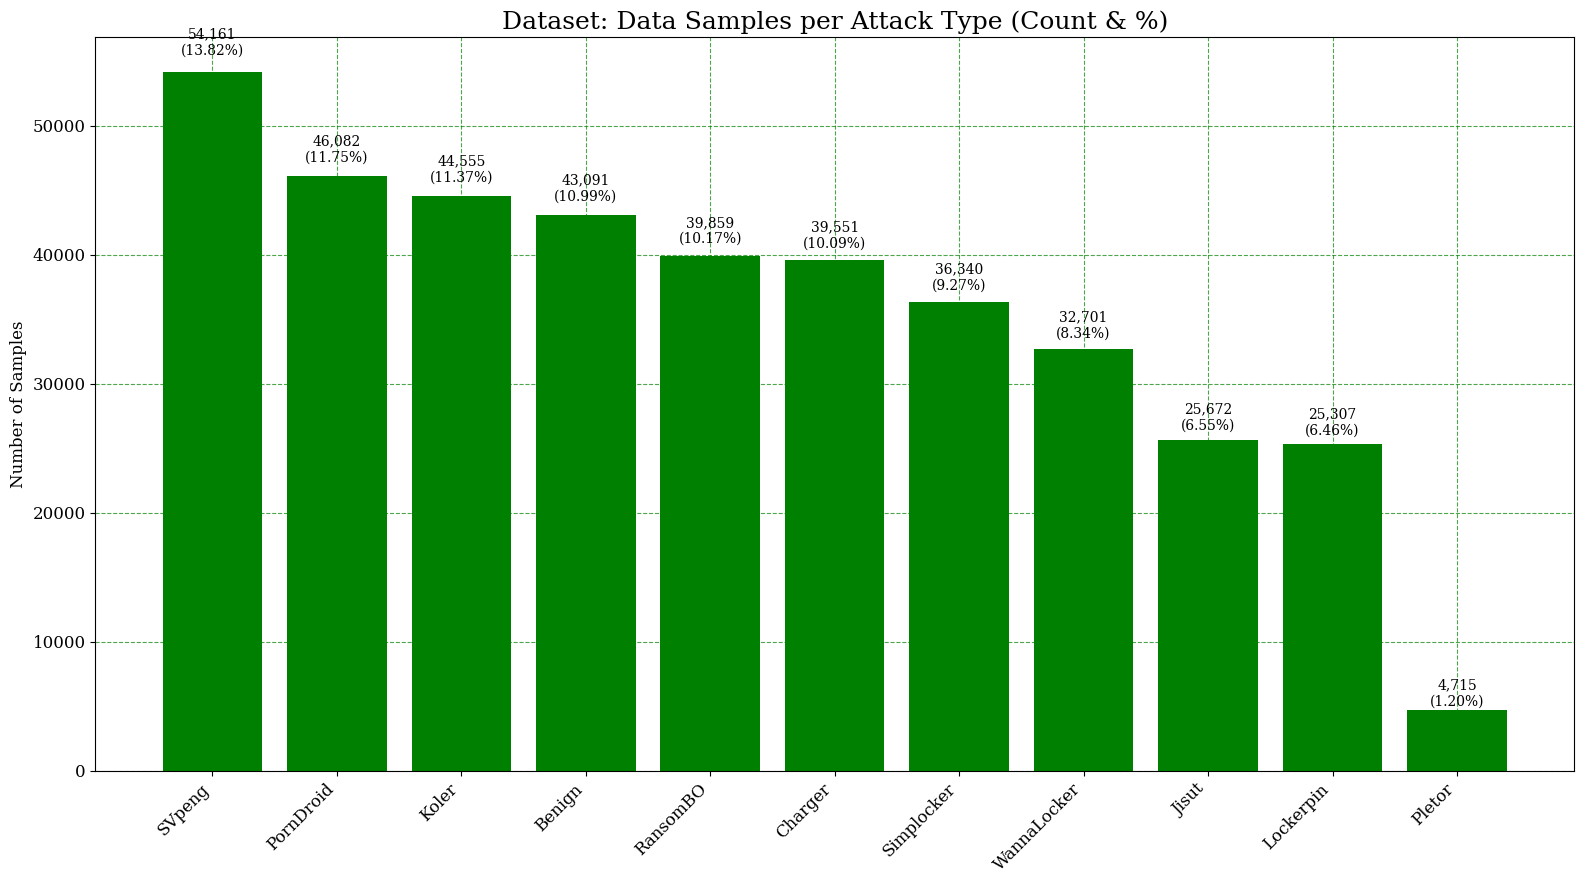

In [14]:
import matplotlib.pyplot as plt

# Count samples and percentages
label_counts = df['Label'].value_counts()
label_percentages = (label_counts / label_counts.sum()) * 100

# Set up the plot
plt.figure(figsize=(16, 9))
bars = plt.bar(label_counts.index, label_counts.values, color='green')  # Bar color set to green

# Add count and percentage text above each bar
for idx, bar in enumerate(bars):
    height = bar.get_height()
    count_text = f'{label_counts.values[idx]:,}'
    percent_text = f'({label_percentages.values[idx]:.2f}%)'

    plt.text(
        bar.get_x() + bar.get_width()/2, height + 0.02*height,
        f'{count_text}\n{percent_text}',
        ha='center', va='bottom', fontsize=10
    )

# Titles and labels
plt.title('Dataset: Data Samples per Attack Type (Count & %)', fontsize=18)
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
#plt.grid(axis='y', linestyle='--', alpha=0.7, color='green')  # Grid color set to green
# Enable both horizontal and vertical green grid lines
plt.grid(axis='both', linestyle='--', alpha=0.7, color='green')

plt.tight_layout()

# Show plot
plt.show()


## **Handle Missing Values**

In [15]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only show columns with missing values

print("Columns with Missing Values:\n", missing_values)


# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# Fill missing values in numerical columns with median
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Fill missing values in categorical columns with mode
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Verify if missing values are filled
print("Missing values after filling:\n", df.isnull().sum().sum())  # Should be 0 if all missing values are handled



Columns with Missing Values:
 Series([], dtype: int64)
Missing values after filling:
 0


In [16]:
# Print the names of the features (columns)
print(df.columns)

Index(['Unnamed: 0', 'Flow ID', ' Source IP', ' Source Port',
       ' Destination IP', ' Destination Port', ' Protocol', ' Timestamp',
       ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Fwd Packet Length Mean', ' Fwd Packet Length Std',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s',
       ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max',
       ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std',
       ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean',
       ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags',
       ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s',
       ' Bwd Packets/s', ' Min Packet Len

## **Data Preprocessing**

In [17]:
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Preprocessing steps
# Replace infinity and large values with NaNs
df = df.replace([np.inf, -np.inf], np.nan)
df = df.replace(to_replace=[r'^(-?\d+\.\d+e\+\d+|-?\d+\.\d+e-\d+|-?\d+\.\d+|-?\d+)$', r'^(-?\d+)$'], value=np.nan, regex=True)

# Drop rows containing NaNs
df.dropna(inplace=True)

# Separate numerical and categorical columns, excluding the 'Label' column from categorical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df.select_dtypes(include=['object']).columns
cat_cols = cat_cols.difference(['Label'])

# Normalize numerical columns
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Ensure all categorical values are strings
df[cat_cols] = df[cat_cols].astype(str)

# Encode categorical columns
encoder = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

# Display the processed DataFrame
df

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,-1.298572,151298,14,0.662205,1328,-0.358896,-0.515637,4,-0.479042,-0.032246,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,Benign
1,-1.297878,151298,14,0.662205,1328,-0.358896,-0.515637,4,-0.485900,-0.151883,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,Benign
2,-1.297185,148227,14,-0.238766,1294,-0.358896,-0.515637,7,-0.485911,-0.151883,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,Benign
3,-1.296491,142970,14,0.903302,1247,-0.358896,-0.515637,8,-0.484230,-0.181792,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,Benign
4,-1.295797,151270,14,0.330548,1328,-0.358896,-0.515637,9,-0.477782,-0.032246,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392029,0.731696,26058,13,0.814087,19,-0.384353,1.874255,27131,-0.484792,-0.181792,...,0.002826,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,WannaLocker
392030,0.732390,53062,13,-0.222643,4986,-0.379784,1.874255,27059,-0.482212,-0.181792,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,WannaLocker
392031,0.733083,15022,13,-0.834362,19,-0.384353,1.874255,27064,-0.483113,-0.181792,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,WannaLocker
392032,0.733777,17539,13,-0.445790,19,-0.384353,1.874255,27120,-0.484786,-0.181792,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,WannaLocker


In [18]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [19]:
df

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,151298,14,0.662205,1328,-0.358896,-0.515637,4,-0.479042,-0.032246,-0.008793,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,Benign
1,151298,14,0.662205,1328,-0.358896,-0.515637,4,-0.485900,-0.151883,-0.107620,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,Benign
2,148227,14,-0.238766,1294,-0.358896,-0.515637,7,-0.485911,-0.151883,-0.107620,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,Benign
3,142970,14,0.903302,1247,-0.358896,-0.515637,8,-0.484230,-0.181792,-0.095267,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,Benign
4,151270,14,0.330548,1328,-0.358896,-0.515637,9,-0.477782,-0.032246,-0.021147,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,Benign
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392029,26058,13,0.814087,19,-0.384353,1.874255,27131,-0.484792,-0.181792,-0.095267,...,0.002826,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,WannaLocker
392030,53062,13,-0.222643,4986,-0.379784,1.874255,27059,-0.482212,-0.181792,-0.095267,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,WannaLocker
392031,15022,13,-0.834362,19,-0.384353,1.874255,27064,-0.483113,-0.181792,-0.095267,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,WannaLocker
392032,17539,13,-0.445790,19,-0.384353,1.874255,27120,-0.484786,-0.181792,-0.095267,...,0.002823,-0.165348,-0.057794,-0.150160,-0.161690,-0.306584,-0.11614,-0.31154,-0.295464,WannaLocker


## **After Processing**

In [20]:
df['Label'].value_counts()

,count
Label,
SVpeng,54161
PornDroid,46082
Koler,44555
Benign,43091
RansomBO,39859
Charger,39551
Simplocker,36340
WannaLocker,32701
Jisut,25672


In [21]:
####Copy the processed df to different df

df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

# **Binary Class (Anomaly) Classification**

In [22]:

df1['Label'] = df1['Label'].apply(lambda x: 'Benign' if x == 'Benign' else 'Ransomware')


In [23]:
# Check counts
print(df1['Label'].value_counts())

Label
Ransomware    348943
Benign         43091
Name: count, dtype: int64


In [24]:
# Define label and feature columns
X = df1.drop(columns=['Label'])
y = df1['Label']

## **Traing and Test Division**

In [25]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                   # Features and target
    test_size=0.3,          # 20% test, 80% train
    random_state=42,        # For reproducibility
)

# Confirm sizes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")


X_train shape: (274423, 84)
X_test shape:  (117611, 84)
y_train shape: (274423,)
y_test shape:  (117611,)


## **Train & Evaluate Decision Tree Classifier**

Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1 Score:  1.0000


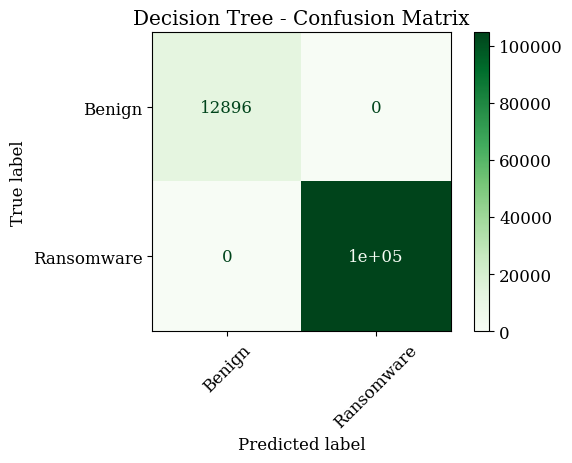

Classification Report:
              precision    recall  f1-score   support

      Benign    1.00000   1.00000   1.00000     12896
  Ransomware    1.00000   1.00000   1.00000    104715

    accuracy                        1.00000    117611
   macro avg    1.00000   1.00000   1.00000    117611
weighted avg    1.00000   1.00000   1.00000    117611



In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = dt_model.predict(X_test)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=dt_model.classes_).plot(cmap='Greens', xticks_rotation=45)
plt.title("Decision Tree - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

## **Train & Evaluate KNN Classifier**

Accuracy:  0.99957
Precision: 0.99957
Recall:    0.99957
F1 Score:  0.99957


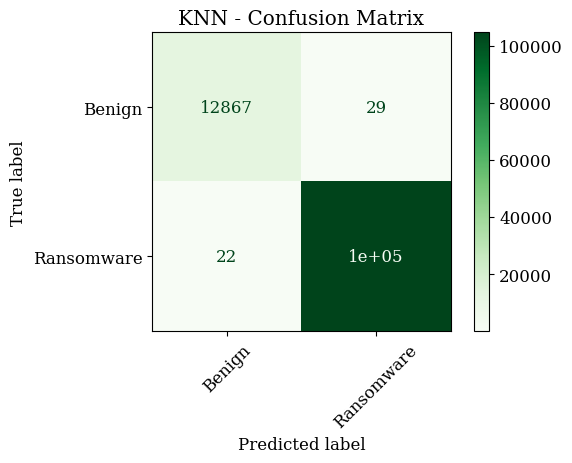

Classification Report:
              precision    recall  f1-score   support

      Benign    0.99829   0.99775   0.99802     12896
  Ransomware    0.99972   0.99979   0.99976    104715

    accuracy                        0.99957    117611
   macro avg    0.99901   0.99877   0.99889    117611
weighted avg    0.99957   0.99957   0.99957    117611



In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = knn_model.predict(X_test)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics (5-digit precision)
print(f"Accuracy:  {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall:    {recall:.5f}")
print(f"F1 Score:  {f1:.5f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=knn_model.classes_).plot(cmap='Greens', xticks_rotation=45)
plt.title("KNN - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report (5-digit precision)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

## **Train & Evaluate Logistic Regression Classifier**

Accuracy:  0.9609
Precision: 0.9597
Recall:    0.9609
F1 Score:  0.9587


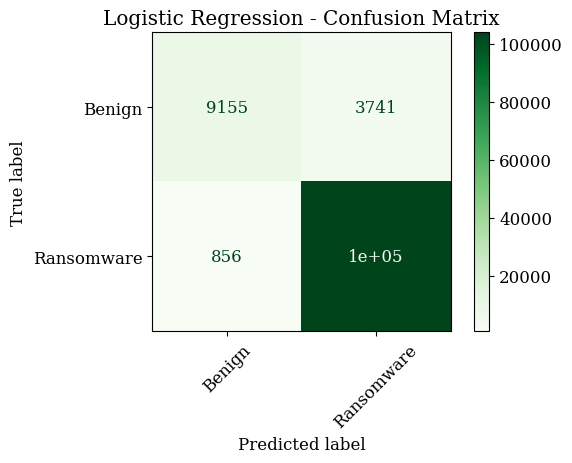

Classification Report:
              precision    recall  f1-score   support

      Benign    0.91449   0.70991   0.79932     12896
  Ransomware    0.96523   0.99183   0.97835    104715

    accuracy                        0.96091    117611
   macro avg    0.93986   0.85087   0.88883    117611
weighted avg    0.95967   0.96091   0.95872    117611



In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

lr_model = LogisticRegression(random_state=42, max_iter=2000, solver='liblinear')
lr_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = lr_model.predict(X_test)

# 3. Evaluation Metrics (same style as your DT code)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lr_model.classes_).plot(cmap='Greens', xticks_rotation=45)
plt.title("Logistic Regression - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

# **Multiclass Classification**

In [29]:
# Define label and feature columns
X = df2.drop(columns=['Label'])
y = df2['Label']

## **Training and Test Division**

In [30]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,                   # Features and target
    test_size=0.2,          # 20% test, 80% train
    random_state=42,        # For reproducibility
    stratify=y              # Ensures class distribution is preserved
)

# Confirm sizes
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")


X_train shape: (313627, 84)
X_test shape:  (78407, 84)
y_train shape: (313627,)
y_test shape:  (78407,)


## **Train & Evaluate Decision Tree Classifier**

Accuracy:  0.9973
Precision: 0.9973
Recall:    0.9973
F1 Score:  0.9973


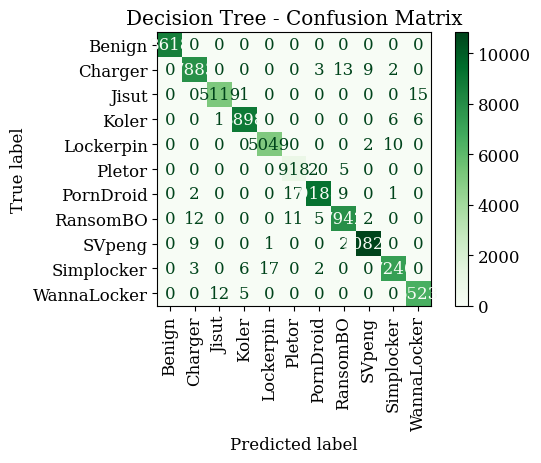

Classification Report:
              precision    recall  f1-score   support

      Benign    1.00000   1.00000   1.00000      8618
     Charger    0.99671   0.99659   0.99665      7910
       Jisut    0.99747   0.99688   0.99718      5135
       Koler    0.99865   0.99854   0.99860      8911
   Lockerpin    0.99645   0.99763   0.99704      5061
      Pletor    0.97040   0.97349   0.97194       943
   PornDroid    0.99675   0.99685   0.99680      9217
    RansomBO    0.99636   0.99624   0.99630      7972
      SVpeng    0.99880   0.99889   0.99885     10832
  Simplocker    0.99738   0.99615   0.99676      7268
 WannaLocker    0.99679   0.99740   0.99710      6540

    accuracy                        0.99733     78407
   macro avg    0.99507   0.99533   0.99520     78407
weighted avg    0.99734   0.99733   0.99733     78407



In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = dt_model.predict(X_test)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=dt_model.classes_).plot(cmap='Greens', xticks_rotation=90)
plt.title("Decision Tree - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

## **Train & Evaluate KNN Classifier**

Accuracy:  0.96185
Precision: 0.96191
Recall:    0.96185
F1 Score:  0.96186


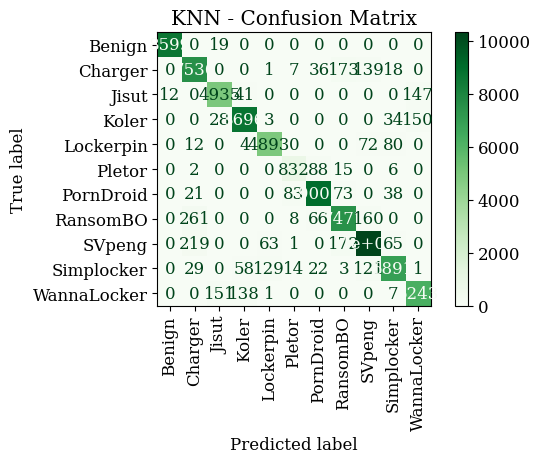

Classification Report:
              precision    recall  f1-score   support

      Benign    0.99861   0.99780   0.99820      8618
     Charger    0.93267   0.95272   0.94259      7910
       Jisut    0.96143   0.96105   0.96124      5135
       Koler    0.97303   0.97587   0.97445      8911
   Lockerpin    0.96130   0.96680   0.96404      5061
      Pletor    0.88042   0.88229   0.88136       943
   PornDroid    0.97699   0.97667   0.97683      9217
    RansomBO    0.94490   0.93791   0.94139      7972
      SVpeng    0.95446   0.95199   0.95323     10832
  Simplocker    0.96526   0.94813   0.95662      7268
 WannaLocker    0.95444   0.95459   0.95451      6540

    accuracy                        0.96185     78407
   macro avg    0.95487   0.95507   0.95495     78407
weighted avg    0.96191   0.96185   0.96186     78407



In [32]:
# @title
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Train KNN Classifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can tune n_neighbors
knn_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = knn_model.predict(X_test)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics (5-digit precision)
print(f"Accuracy:  {accuracy:.5f}")
print(f"Precision: {precision:.5f}")
print(f"Recall:    {recall:.5f}")
print(f"F1 Score:  {f1:.5f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=knn_model.classes_).plot(cmap='Greens', xticks_rotation=90)
plt.title("KNN - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report (5-digit precision)
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

## **Train & Evaluate Logistic Regression Classifier**

Accuracy:  0.3349
Precision: 0.2755
Recall:    0.3349
F1 Score:  0.2593


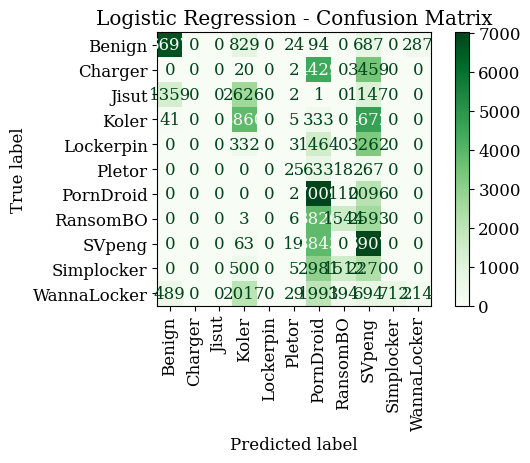

Classification Report:
              precision    recall  f1-score   support

      Benign    0.77999   0.77709   0.77854      8618
     Charger    0.00000   0.00000   0.00000      7910
       Jisut    0.00000   0.00000   0.00000      5135
       Koler    0.37659   0.43317   0.40290      8911
   Lockerpin    0.00000   0.00000   0.00000      5061
      Pletor    0.20492   0.02651   0.04695       943
   PornDroid    0.26346   0.76044   0.39133      9217
    RansomBO    0.43153   0.19368   0.26736      7972
      SVpeng    0.24620   0.63765   0.35524     10832
  Simplocker    0.00000   0.00000   0.00000      7268
 WannaLocker    0.42715   0.03272   0.06079      6540

    accuracy                        0.33487     78407
   macro avg    0.24817   0.26012   0.20937     78407
weighted avg    0.27548   0.33487   0.25926     78407



In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# 1. Train Logistic Regression Classifier
lr_model = LogisticRegression(random_state=42, max_iter=2000, solver="liblinear")
lr_model.fit(X_train, y_train)

# 2. Predict on Test Set
y_pred = lr_model.predict(X_test)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=lr_model.classes_).plot(cmap='Greens', xticks_rotation=90)
plt.title("Logistic Regression - Confusion Matrix")
plt.tight_layout()
plt.show()

# 6. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))

**Train & Evaluate Bagger Model**

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.utils import shuffle
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np # Import numpy for unique()


# 1. Train Bagging Model
# Using default base estimator (DecisionTreeClassifier)
lr_model = BaggingClassifier(n_estimators=50, random_state=42)
lr_model.fit(X_train, y_train)



# Function to update the model with new data (self-learning)
def update_model_with_new_data(lr_model, new_data, new_labels):
    # Shuffle and preprocess new data
    new_data, new_labels = shuffle(new_data, new_labels)

    # Incrementally update the model with new batches of data
    lr_model.fit(new_data, new_labels)
    return lr_model

# Simulate incoming new data (replace with actual data collection logic)
new_data = collect_new_data_from_device()  # Get new network traffic data
new_labels = predict_ransomware_labels(new_data)  # Get labels for the data

# Update the model with the new data
lr_model = update_model_with_new_data(lr_model, new_data, new_labels)



# 2. Predict on Test Set
y_pred =lr_model.predict(X_test)

# 3. Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# 4. Print Basic Metrics
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)



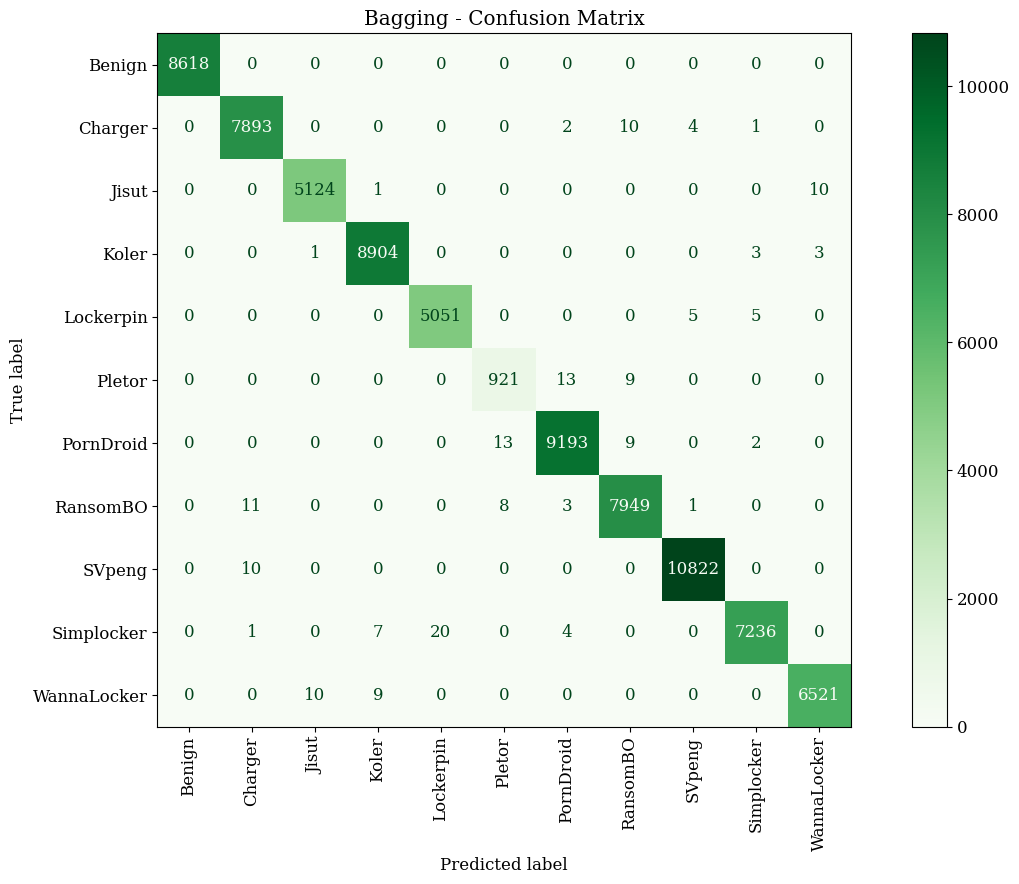

Classification Report:
              precision    recall  f1-score   support

      Benign    1.00000   1.00000   1.00000      8618
     Charger    0.99722   0.99785   0.99754      7910
       Jisut    0.99786   0.99786   0.99786      5135
       Koler    0.99809   0.99921   0.99865      8911
   Lockerpin    0.99606   0.99802   0.99704      5061
      Pletor    0.97771   0.97667   0.97719       943
   PornDroid    0.99761   0.99740   0.99750      9217
    RansomBO    0.99649   0.99711   0.99680      7972
      SVpeng    0.99908   0.99908   0.99908     10832
  Simplocker    0.99848   0.99560   0.99704      7268
 WannaLocker    0.99801   0.99709   0.99755      6540

    accuracy                        0.99777     78407
   macro avg    0.99606   0.99599   0.99602     78407
weighted avg    0.99777   0.99777   0.99777     78407



In [48]:
# Create figure and axis with increased size
fig, ax = plt.subplots(figsize=(13, 9)) # Increased figure size for better readability
ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test)).plot(cmap='Greens', xticks_rotation=90, ax=ax)
plt.title("Bagging - Confusion Matrix")
plt.tight_layout()
plt.show()






# 6. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=0, digits=5))


# **Modified Confusion Matrix**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

cm = confusion_matrix(y_test, y_pred)

# Colormap
cmap = sns.color_palette("crest", as_cmap=True)

# Automatically get class labels from model
class_labels = knn_model.classes_

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 7))

# Plot CM
sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, cbar=True,
            ax=ax, annot_kws={"fontsize": 10}, linewidths=1, linecolor='white')

ax.set_title("Confusion Matrix for KNN")
ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_xticklabels(class_labels, rotation=45)
ax.set_yticklabels(class_labels, rotation=0)

plt.tight_layout()
plt.show()


# **Thank you Everyone!**